In [58]:
#Packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

#Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [59]:
recipes=pd.read_csv('MuffinVsCupcake.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


C:\Users\venka\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


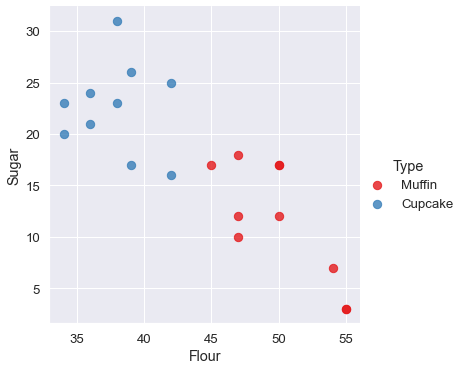

In [60]:
#plot the data
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70});


In [61]:
#format or pre-process our data
type_label=np.where(recipes['Type']=='Muffin',0,1)
recipe_features=recipes.columns.values[1:].tolist()
recipe_features
ingredients=recipes[['Flour','Milk']].values
print(ingredients)

[[55 28]
 [47 24]
 [47 23]
 [45 11]
 [50 25]
 [55 27]
 [54 27]
 [47 26]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [62]:
#fit model
model=svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [63]:
#get the sepearating hyperplane
w=model.coef_[0]
a=-w[0] / w[1]
xx=np.linspace(30, 60)
yy=a* xx - (model.intercept_[0]) / w[1]



#plot the parallels to seperating hyperplane that pass through support vectors
b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

C:\Users\venka\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


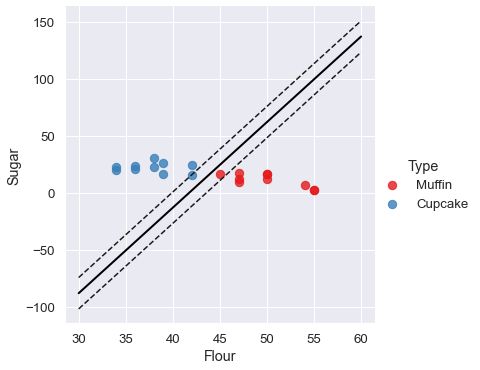

In [65]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [67]:
#create a function to predict muffin or cupcake

def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("You're looking at muffin recipe!")
    else:
        print("You're looking at cupcake recipe!")
        
muffin_or_cupcake(50,20)

You're looking at muffin recipe!


C:\Users\venka\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


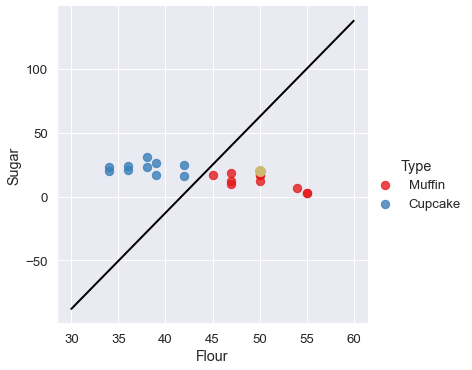

In [70]:
#let's plot this on the graph
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette="Set1",fit_reg=False,scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50,20, 'yo', markersize='10')